In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython
import numpy as np
import os
from IPython.display import Image as Image2
from numpy import genfromtxt 
import pickle
from IPython import embed
from PIL import Image, ImageDraw, ImageFont 

import seaborn as sns
import pandas as pd
%matplotlib inline
from scipy import ndimage
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import matplotlib.patches as mpatches
import random
from sklearn.cluster import KMeans

In [2]:
my_data = genfromtxt('../data/sperm-whale-dialogues.csv', delimiter=',',dtype=None,encoding="utf8")
my_data[0,:]

array(['REC', 'nClicks', 'Duration', 'ICI1', 'ICI2', 'ICI3', 'ICI4',
       'ICI5', 'ICI6', 'ICI7', 'ICI8', 'ICI9', 'ICI10', 'ICI11', 'ICI12',
       'ICI13', 'ICI14', 'ICI15', 'ICI16', 'ICI17', 'ICI18', 'ICI19',
       'ICI20', 'ICI21', 'ICI22', 'ICI23', 'ICI24', 'ICI25', 'ICI26',
       'ICI27', 'ICI28', 'Whale', 'TsTo'], dtype='<U15')

In [3]:
my_data.shape

(3841, 33)

In [4]:
n_clicks = []

for i in range(1,my_data.shape[0]):
    fname = my_data[i,1][:5]
    n_clicks.append(my_data[i,1].astype(int))

Text(0.5, 0, 'Number of clicks')

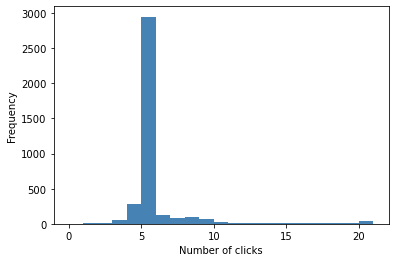

In [5]:
BINS = np.arange(0, 22, 1)
plt.hist(n_clicks, density=False, bins=BINS,color='steelblue')
plt.ylabel('Frequency')
plt.xlabel('Number of clicks')


In [6]:
# Response time 

In [7]:
response_time = []
for i in range(2,my_data.shape[0]):
    curr_name=my_data[i,0][:6]
    curr_time= my_data[i,-1].astype(float)
    
    prev_name=my_data[i-1,0][:6]
    prev_time= my_data[i-1,-1].astype(float) 
    
    if curr_name==prev_name and (curr_time-prev_time)<30:
        response_time.append(curr_time-prev_time)

Text(0.5, 0, 'Response Time')

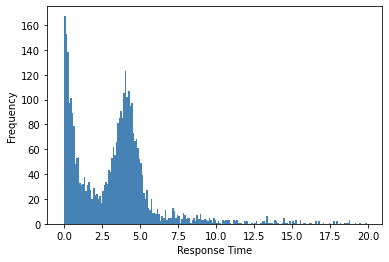

In [8]:
BINS = np.arange(-0.1, 20, 0.1)
plt.hist(response_time, density=False, bins=BINS,color='steelblue')
plt.ylim(0,175)
plt.ylabel('Frequency')
plt.xlabel('Response Time')

Text(0.5, 0, 'Response Time')

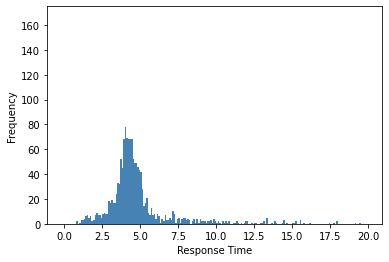

In [9]:
response_time = []
for i in range(2,my_data.shape[0]):
    curr_name=my_data[i,0][:6]
    curr_time= my_data[i,-1].astype(float)
    curr_w = my_data[i,-2].astype(int)
    
    prev_name=my_data[i-1,0][:6]
    prev_time= my_data[i-1,-1].astype(float) 
    prev_w = my_data[i-1,-2].astype(int)
    
    if curr_name==prev_name and (curr_time-prev_time)<30:
        if curr_w==prev_w:
            response_time.append(curr_time-prev_time)
BINS = np.arange(-0.1, 20, 0.1)
plt.hist(response_time, density=False, bins=BINS,color='steelblue')
plt.ylim(0,175)
plt.ylabel('Frequency')
plt.xlabel('Response Time')  

Text(0.5, 0, 'Response Time')

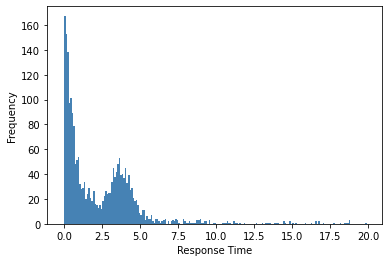

In [10]:
response_time = []
for i in range(2,my_data.shape[0]):
    curr_name=my_data[i,0][:6]
    curr_time= my_data[i,-1].astype(float)
    curr_w = my_data[i,-2].astype(int)
    
    prev_name=my_data[i-1,0][:6]
    prev_time= my_data[i-1,-1].astype(float) 
    prev_w = my_data[i-1,-2].astype(int)
    
    if curr_name==prev_name and (curr_time-prev_time)<30:
        if curr_w!=prev_w:
            response_time.append(curr_time-prev_time)
BINS = np.arange(-0.1, 20, 0.1)
plt.hist(response_time, density=False, bins=BINS,color='steelblue')
plt.ylim(0,175)

plt.ylabel('Frequency')
plt.xlabel('Response Time')   

In [11]:
# Codas ascending order

In [12]:
my_data = genfromtxt('../data/DominicaCodas.csv', delimiter=',',dtype=None,encoding="utf8")
my_data[0,:]

array(['\ufeffcodaNUM2018', 'Date', 'nClicks', 'Duration', 'ICI1', 'ICI2',
       'ICI3', 'ICI4', 'ICI5', 'ICI6', 'ICI7', 'ICI8', 'ICI9', 'CodaType',
       'Clan', 'Unit', 'UnitNum', 'IDN'], dtype='<U12')

In [13]:
durations = []

for i in range(1,my_data.shape[0]):
    clan = my_data[i,-4]
#     if clan=='EC1':
    durations.append(my_data[i,3].astype(float))
sort_index = np.argsort(durations)

In [14]:
def return_relative(idx):
    n_clicks = my_data[idx,2].astype(int)
    rel_ICI = []
    rel_ICI.append(0)
    for t in range(4,3+n_clicks):
        rel_ICI.append(np.sum(my_data[idx,4:t].astype(float)))
    return rel_ICI

(0.0, 2.0)

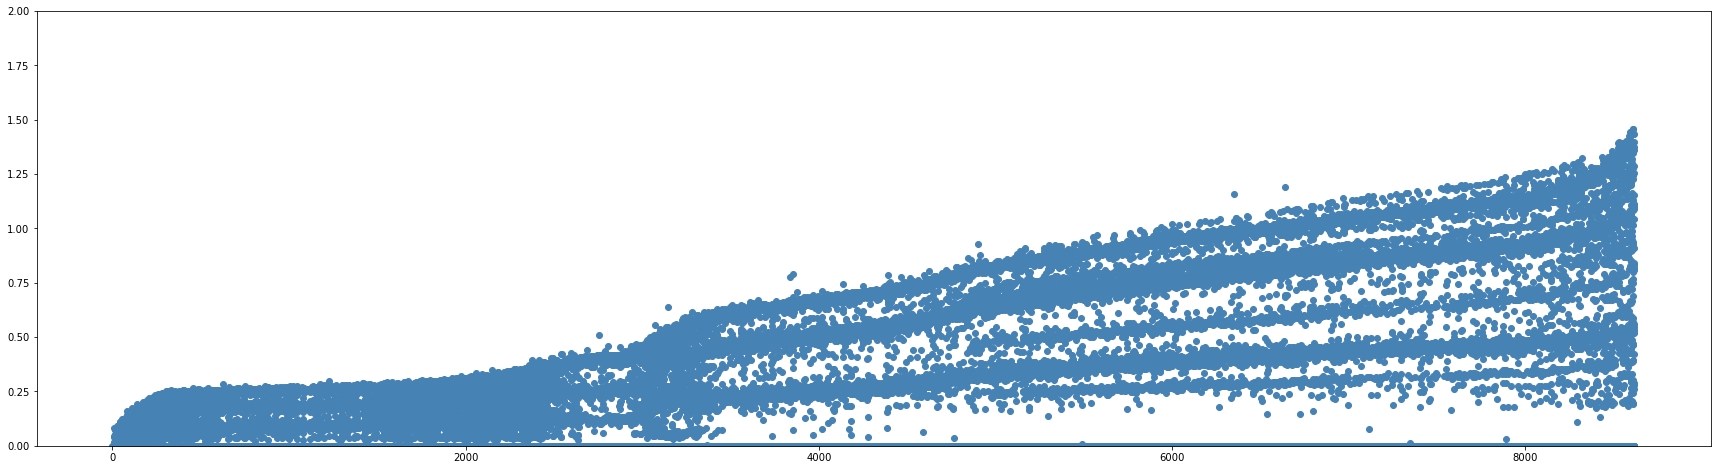

In [22]:
fig = plt.figure(figsize=(30, 8))

for i in range(len(sort_index)-100):
    idx = sort_index[i]+1
    relative_ICIs = return_relative(idx)
    x = len(relative_ICIs)*[i]
    plt.scatter(x,relative_ICIs,color='steelblue',rasterized=False)
plt.ylim(0,2)

(0.0, 2.0)

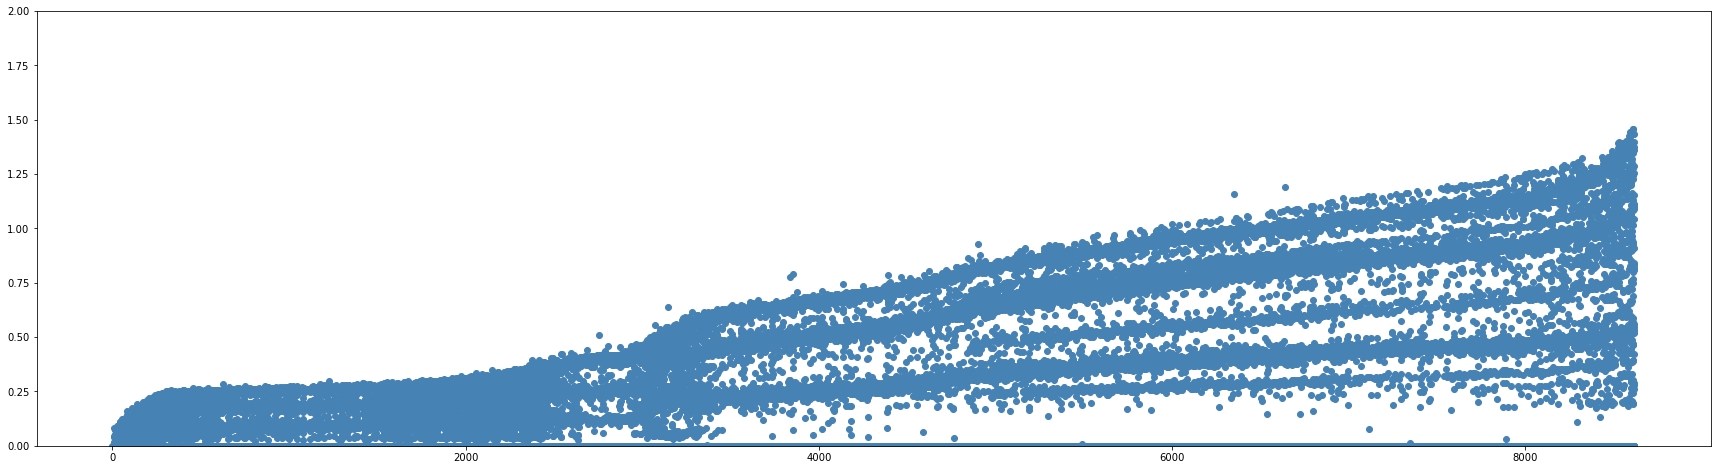

In [23]:
fig = plt.figure(figsize=(30, 8))

for i in range(len(sort_index)-100):
    idx = sort_index[i]+1
    relative_ICIs = return_relative(idx)
    x = len(relative_ICIs)*[i]
    plt.scatter(x,relative_ICIs,color='steelblue',rasterized=False)
plt.ylim(0,2)